In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
bfdata = pd.read_csv("BlackFridaySales.csv")

bfdata

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Crime_rate,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,8,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,6,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,17,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,17,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,13,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1000175,P00307642,F,26-35,2,B,10,1,0,5,6.0,NaN,1772
1041,1000175,P00052842,F,26-35,2,B,15,1,0,10,15.0,NaN,23341
1042,1000175,P00057542,F,26-35,2,B,8,1,0,3,4.0,5.0,10604
1043,1000175,P00064042,F,26-35,2,B,8,1,0,3,4.0,12.0,10681


Data Cleaning

In [9]:
bfdata.drop(columns=['Crime_rate'],inplace=True)
bfdata.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Checking Null Values

In [10]:
bfdata.isnull().sum()

User_ID                         0
Product_ID                      0
Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Stay_In_Current_City_Years      0
Marital_Status                  0
Product_Category_1              0
Product_Category_2            313
Product_Category_3            708
Purchase                        0
dtype: int64

In [11]:
bfdata.drop(columns=['Product_Category_2','Product_Category_3'],inplace=True)
bfdata.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [12]:
bfdata.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

Creating training/test sets

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bfdata, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())

836 209
     User_ID Product_ID Gender    Age  Occupation City_Category  \
554  1000102  P00274942      M  36-45          19             C   
485  1000090  P00127942      M    55+          13             C   
345  1000058  P00119142      M  26-35           2             B   
827  1000149  P00283942      M  26-35           1             B   
730  1000139  P00249642      F  26-35          20             C   

     Stay_In_Current_City_Years  Marital_Status  Product_Category_1  Purchase  
554                           3               0                   8      4102  
485                           1               0                   1     11605  
345                           3               0                   3     13557  
827                           2               1                   5      6998  
730                           2               0                   3      8314  
     User_ID Product_ID Gender    Age  Occupation City_Category  \
803  1000148  P00074442      M  51-55     

I will be considering `Stay_In_Current_City_Years` as X and `Purchase` as Y. The reason I chose these is because I  noticed that those who have lived in the city for one year likely to spend the most.This is comprehensible since individuals who have lived in the city for more than four years are often more established and less interested in buying new goods than those who are new to the city, who tend to spend more.

<function matplotlib.pyplot.show(close=None, block=None)>

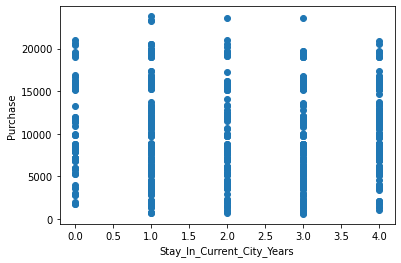

In [14]:
bfdata2 = bfdata.copy()

plt.scatter(bfdata2["Stay_In_Current_City_Years"],bfdata2["Purchase"])
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.show

In [15]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

X = bfdata2[["Stay_In_Current_City_Years"]]
Y = bfdata2["Purchase"]
lreg.fit(X,Y)

LinearRegression()

9579.540290053235 33.97423618314454


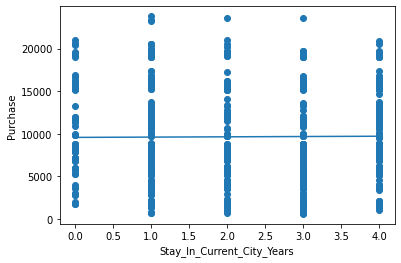

In [16]:
theta0 = lreg.intercept_
theta1 = lreg.coef_[0]
print(theta0, theta1)
def opline(h, bias, coef):
    return bias + coef * h

min_height = bfdata2["Stay_In_Current_City_Years"].min()
min_weight = opline(min_height, theta0, theta1)
max_height = bfdata2["Stay_In_Current_City_Years"].max()
max_weight = opline(max_height, theta0, theta1)
line_x = [min_height, max_height]
line_y = [min_weight, max_weight]


import matplotlib.pyplot as plt
plt.scatter(bfdata2["Stay_In_Current_City_Years"], bfdata2["Purchase"])
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.plot(line_x, line_y)
plt.show()

In [17]:
print(lreg.score(X,Y))

7.57210227776417e-05


The regression value is low and hence the performance is low.

In [19]:
from sklearn.metrics import mean_squared_error
y_pred = lreg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)

from math import sqrt
rms = sqrt(mse)
print("The root mean squared error is ", rms)

mean squared error is  26051090.83814667
The root mean squared error is  5104.026923728623


9579.540290053235 33.97423618314454


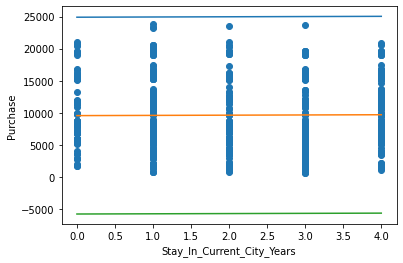

In [20]:
band = 3*rms

theta0 = lreg.intercept_
theta1 = lreg.coef_[0]
print(theta0, theta1)
def opline(h, bias, coef):
    return bias + coef * h

min_height = bfdata2["Stay_In_Current_City_Years"].min()
min_weight = opline(min_height, theta0, theta1)
max_height = bfdata2["Stay_In_Current_City_Years"].max()
max_weight = opline(max_height, theta0, theta1)
line_x = [min_height, max_height]
line_y = [min_weight, max_weight]
upper_line_y = [min_weight+band, max_weight+band]
lower_line_y = [min_weight-band, max_weight-band]


import matplotlib.pyplot as plt
plt.scatter(bfdata2["Stay_In_Current_City_Years"], bfdata2["Purchase"])
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.plot(line_x, upper_line_y)
plt.plot(line_x, line_y)
plt.plot(line_x, lower_line_y)
plt.show()

In [21]:
years =[[1], [2], [4]]   # This is an array of input vectors
ppurchase = lreg.predict(years)
print(ppurchase)

[9613.51452624 9647.48876242 9715.43723479]


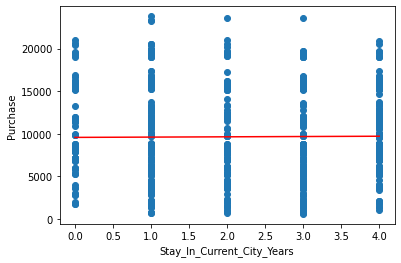

In [22]:
years1 = bfdata2["Stay_In_Current_City_Years"].min()
years2 = bfdata2["Stay_In_Current_City_Years"].max()
line_x = [years1, years2]
line_y = lreg.predict([[years1], [years2]])


import matplotlib.pyplot as plt
plt.scatter(bfdata2["Stay_In_Current_City_Years"], bfdata2["Purchase"])
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.plot(line_x, line_y, color="red")
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
rpluslreg = LinearRegression()

X = bfdata2[[ "Stay_In_Current_City_Years", "Purchase"]]
Y = bfdata2["Purchase"]
rpluslreg.fit(X, Y)

print(rpluslreg.score(X,Y))
print(rpluslreg.intercept_ , rpluslreg.coef_)

1.0
-1.8189894035458565e-12 [-9.37597041e-15  1.00000000e+00]


0.0004436329084468449


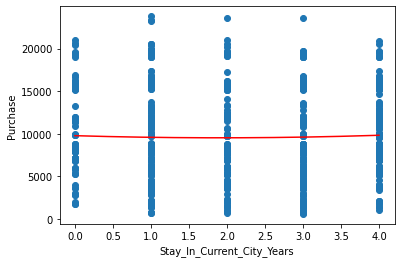

In [24]:
from sklearn.linear_model import LinearRegression
reg_plus_quad = LinearRegression()

X = bfdata2[["Stay_In_Current_City_Years"]]
Y = bfdata2["Purchase"]

from sklearn.preprocessing import PolynomialFeatures
create_quad_terms = PolynomialFeatures(degree=2, include_bias=False)
X_quad_terms = create_quad_terms.fit_transform(X)

                
                
reg_plus_quad.fit(X_quad_terms, Y)

print(reg_plus_quad.score(X_quad_terms,Y))

min_height = bfdata2["Stay_In_Current_City_Years"].min()
max_height = bfdata2["Stay_In_Current_City_Years"].max()
points = 1000
delta = (max_height-min_height)/points
quad_x = [min_height + i*delta for i in range(points)]
inputs = [[h, h*h] for h in quad_x]
quad_y = reg_plus_quad.predict(inputs)


import matplotlib.pyplot as plt
plt.scatter(bfdata2["Stay_In_Current_City_Years"], bfdata2["Purchase"])
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.plot(quad_x, quad_y, color="red")
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
reg_plus_cube = LinearRegression()

X = bfdata2[["Stay_In_Current_City_Years"]]
Y = bfdata2["Purchase"]

from sklearn.preprocessing import PolynomialFeatures
create_cube_terms = PolynomialFeatures(degree=3, include_bias=False)
X_cube_terms = create_cube_terms.fit_transform(X)

                
                
reg_plus_cube.fit(X_cube_terms, Y)

print(reg_plus_cube.score(X_cube_terms,Y))

min_height = bfdata2["Stay_In_Current_City_Years"].min()
max_height = bfdata2["Purchase"].max()
points = 1000
delta = (max_height-min_height)/points
cube_x = [min_height + i*delta for i in range(points)]
inputs = [[h, h*h, h**3] for h in cube_x]
cube_y = reg_plus_cube.predict(inputs)

import matplotlib.pyplot as plt

0.0004622162315675027


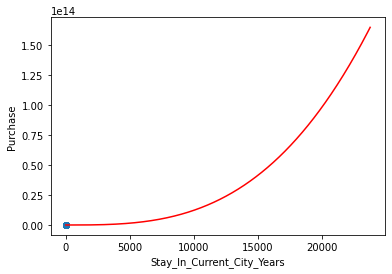

In [26]:
plt.scatter(bfdata2["Stay_In_Current_City_Years"], bfdata2["Purchase"])
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.plot(cube_x, cube_y, color="red")
plt.show()

In [27]:
X = test_set[["Stay_In_Current_City_Years"]]
Y = test_set["Purchase"]

from sklearn.preprocessing import PolynomialFeatures
create_cube_terms = PolynomialFeatures(degree=3, include_bias=False)
X_cube_terms = create_cube_terms.fit_transform(X)


print(reg_plus_cube.score(X_cube_terms, Y))

-0.0038749008438119237


The regression for the model is very low
I believe adding more freature will increase the performance of the model